# Database and library installation and setup

### Import libraries

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from ast import literal_eval

### Functions

In [ ]:
def dict_to_list(dict_str):
    """
    Parses a json dictionary into a list
    """
    try:
        genre_dict = literal_eval(dict_str)
        return list(genre_dict.values())
    except (ValueError, SyntaxError):
        return None
    
def str_to_list(str):
    """
    Parses a string which includes values seperated by commas and returns a list
    """
    try:
        return str.split(", ")
    except AttributeError:
        return None

def get_capitalized_first_letter(text):
    """
    Splits the string into words by ' '. Capitalizes the first
    letter of every word.
    """
    return ' '.join(word.capitalize() for word in text.split())

Hello Man


### Database setup

In [118]:
PATH = 'cmu/'

movies = pd.read_csv(PATH + 'movie.metadata.tsv', sep='\t', header=None)
movies.columns = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres']
movies['Extracted Genres'] = movies['Movie genres'].apply(dict_to_list)
movies['Extracted Languages'] = movies['Movie languages'].apply(dict_to_list)
movies['Movie box office revenue'] = pd.to_numeric(movies['Movie box office revenue'], errors='coerce')
movies = movies.dropna(subset=['Movie name', 'Movie box office revenue', 'Extracted Genres'])

characters = pd.read_csv(PATH + 'character.metadata.tsv', sep='\t', header=None)
characters.columns = ['Wikipedia movie ID', 'Freebase movie ID','Movie release date', 'Character Name', 'Actor DOB', 'Actor gender', 'Actor height', 'Actor ethnicity', 'Actor Name', 'Actor age at movie release', 'Freebase character map', 'Freebase character ID', 'Freebase actor ID']

names = pd.read_csv(PATH + 'name.clusters.txt', sep='\t', header=None)
names.columns = ['Character Name', 'Freebase actor ID']

plot_summaries = pd.read_csv(PATH + 'plot_summaries.txt', sep='\t', header=None)
plot_summaries.columns = ['Wikipedia movie ID', 'Plot']

tvtropes = pd.read_csv(PATH + 'tvtropes.clusters.txt', sep='\t', header=None)
tvtropes.columns = ['Trope', 'Info']

tmdb = pd.read_csv(PATH + 'TMDB.csv', sep=',', header=0)
tmdb.columns = ['id', 'Movie name', 'vote_average', 'vote_count' , 'status' , 'release_date' , 'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords' , 'net revenue', 'revenue/budget']
tmdb['Extracted Genres'] = tmdb['genres'].apply(str_to_list)
tmdb['Extracted Languages'] = tmdb['spoken_languages'].apply(str_to_list)

In [119]:
GRAPH_COLORS = ['#F8AE54', '#CA6C0F']
GRAPH_EDGECOLOR = '#732E00'

# Histogram of Box Office Revenue

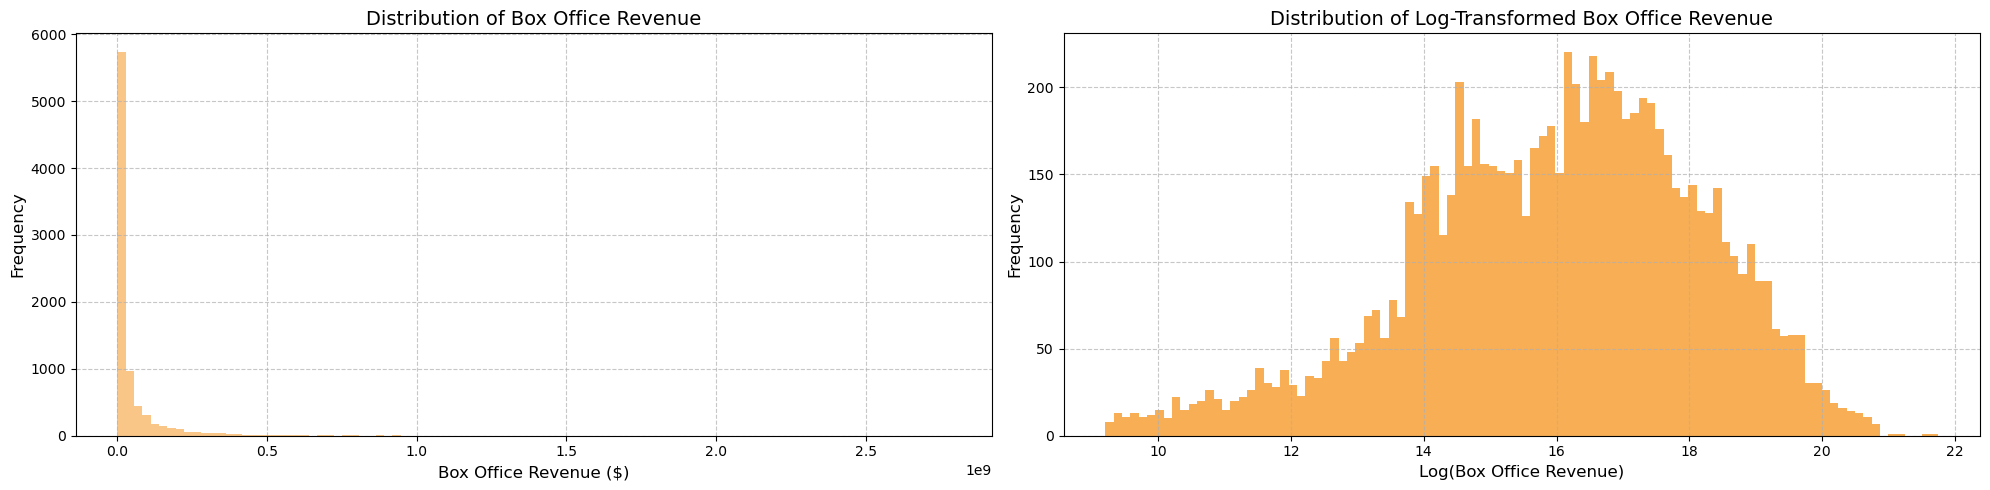

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Original Distribution
axes[0].hist(movies['Movie box office revenue'], bins=100, alpha=0.7, color=GRAPH_COLORS[0])
axes[0].set_title('Distribution of Box Office Revenue', fontsize=14)
axes[0].set_xlabel('Box Office Revenue ($)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(linestyle='--', alpha=0.7)

# Log-Transformed Distribution
axes[1].hist(np.log1p(movies['Movie box office revenue']), bins=100, color=GRAPH_COLORS[0])
axes[1].set_title('Distribution of Log-Transformed Box Office Revenue', fontsize=14)
axes[1].set_xlabel('Log(Box Office Revenue)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


The histogram of box office revenue, before transformation, shows a highly right-skewed distribution. Most movies earn relatively low revenues, while a small number of blockbuster hits dominate the higher end of the spectrum, creating a long tail. This skewed distribution can make it challenging to observe trends or analyze the majority of the data effectively.

After applying a logarithmic transformation, the distribution becomes more normalized, compressing the range of values. The log-transformed plot reveals a more balanced spread of revenue values, making it easier to analyze the central tendency and variability. This transformation is particularly useful for statistical models, as it mitigates the influence of outliers and ensures better interpretability of relationships between revenue and other features.

# Runtime

#### Scatter Plot

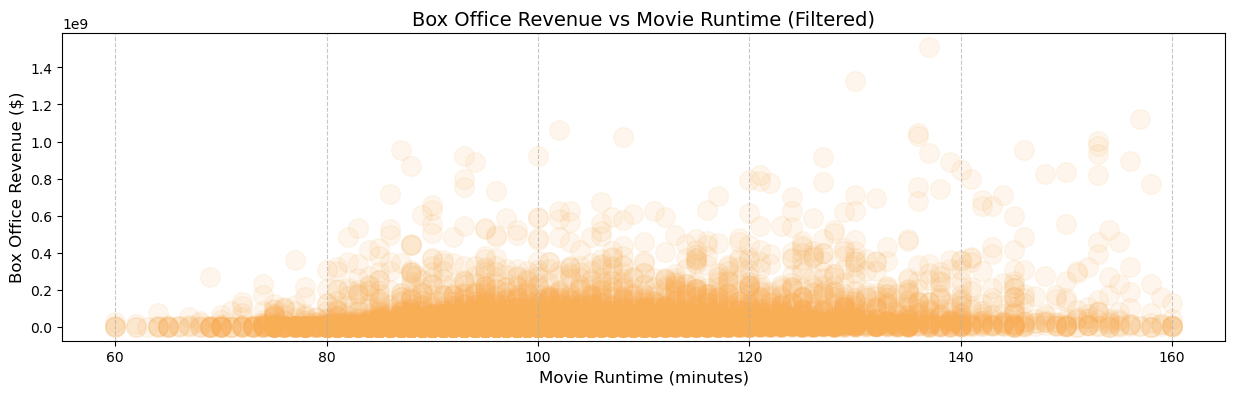

In [169]:
# Filter out movies with runtime > 300 minutes and revenue > 1e9
filtered_movies = movies[(movies['Movie runtime'] <= 160) &
                                 (movies['Movie runtime'] >= 60)]

plt.figure(figsize=(15, 4))
plt.scatter(filtered_movies['Movie runtime'], filtered_movies['Movie box office revenue'], alpha=0.1, s=200, color=GRAPH_COLORS[0])
plt.title('Box Office Revenue vs Movie Runtime (Filtered)', fontsize=14)
plt.xlabel('Movie Runtime (minutes)', fontsize=12)
plt.ylabel('Box Office Revenue ($)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


The scatter plot highlights the relationship between movie runtime and box office revenue for films within the 60 to 160-minute range. Movies with runtimes between 80 and 140 minutes consistently generate revenues from 0 to 200 million dollars, with a dense concentration of moderately successful films. This suggests that this runtime range aligns well with audience preferences for standard-length films.

Films shorter than 80 minutes rarely achieve high box office revenues, indicating that shorter runtimes may not resonate with mainstream audiences or justify large-scale theatrical releases. On the other hand, movies exceeding 140 minutes begin to venture into blockbuster territory, as evident from the increased presence of high-revenue outliers. This suggests that longer runtimes may signal epic storytelling or higher-budget productions, which are often associated with significant box office success.

Overall, the plot suggests that while the 80–140 minute range is a safe zone for consistent performance, pushing past 140 minutes might yield higher returns when paired with the right content and production scale.

#### Analysis

Pearson Correlation Coefficient: 0.22 (p-value: 1.0343e-86)
Spearman Correlation Coefficient: 0.29 (p-value: 3.4180e-154)


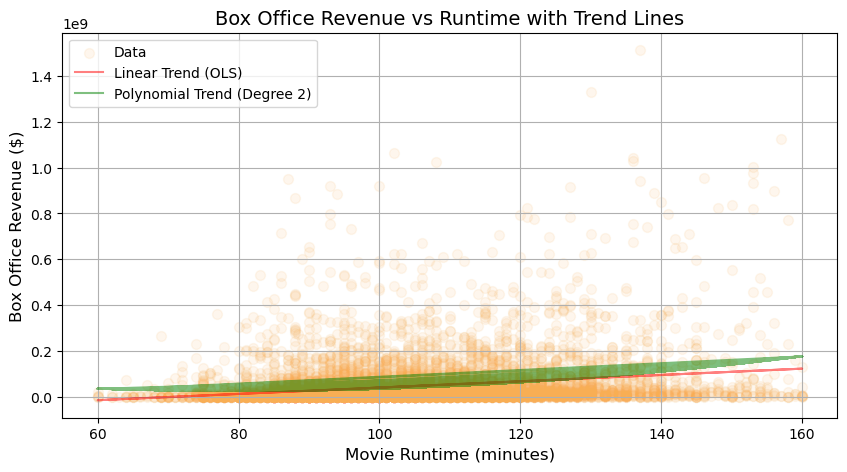

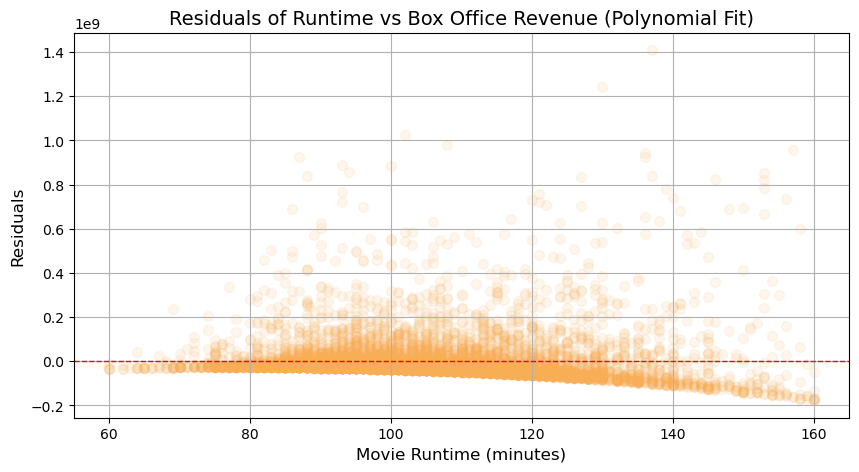

In [183]:
# Calculate Pearson and Spearman correlations
pearson_corr, pearson_p = stats.pearsonr(filtered_movies['Movie runtime'], filtered_movies['Movie box office revenue'])
spearman_corr, spearman_p = stats.spearmanr(filtered_movies['Movie runtime'], filtered_movies['Movie box office revenue'])

# Print results
print(f"Pearson Correlation Coefficient: {pearson_corr:.2f} (p-value: {pearson_p:.4e})")
print(f"Spearman Correlation Coefficient: {spearman_corr:.2f} (p-value: {spearman_p:.4e})")

# Plotting scatter plot with trend lines
plt.figure(figsize=(10, 5))

# Scatter plot of runtime vs revenue
plt.scatter(filtered_movies['Movie runtime'], filtered_movies['Movie box office revenue'], alpha=0.1, label='Data', color=GRAPH_COLORS[0], s=50)

# Linear regression trend line
X = sm.add_constant(filtered_movies['Movie runtime'])
model = sm.OLS(filtered_movies['Movie box office revenue'], X).fit()
plt.plot(filtered_movies['Movie runtime'], model.predict(X), color='red', alpha=0.5, label='Linear Trend (OLS)')

# Polynomial regression (degree=2) trend line
poly_coefs = np.polyfit(filtered_movies['Movie runtime'], filtered_movies['Movie box office revenue'], deg=2)
poly_fit = np.poly1d(poly_coefs)
plt.plot(filtered_movies['Movie runtime'], poly_fit(filtered_movies['Movie runtime']), alpha=0.5, color='green', label='Polynomial Trend (Degree 2)')

plt.title('Box Office Revenue vs Runtime with Trend Lines', fontsize=14)
plt.xlabel('Movie Runtime (minutes)', fontsize=12)
plt.ylabel('Box Office Revenue ($)', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Residuals for Polynomial Fit
plt.figure(figsize=(10, 5))
plt.scatter(filtered_movies['Movie runtime'], 
            filtered_movies['Movie box office revenue'] - poly_fit(filtered_movies['Movie runtime']), 
            alpha=0.1, color=GRAPH_COLORS[0], s=50)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals of Runtime vs Box Office Revenue (Polynomial Fit)', fontsize=14)
plt.xlabel('Movie Runtime (minutes)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid()
plt.show()


1. **Pearson Correlation**:
   - Coefficient: **0.22** (p-value: **1.0343e-86**) indicates a weak positive linear relationship.

2. **Spearman Correlation**:
   - Coefficient: **0.29** (p-value: **3.4180e-154**) suggests a weak but stronger monotonic relationship, indicating non-linearity.

3. **Trend Lines**:
   - Linear regression shows a weak upward trend.
   - Polynomial regression reveals diminishing returns for runtimes beyond 120–140 minutes.

Runtime has a weak but statistically significant influence on revenue. The non-linear trend suggests slight revenue gains with longer runtimes.


# Language

#### Language vs Box Office Revenue (Bar Plot)

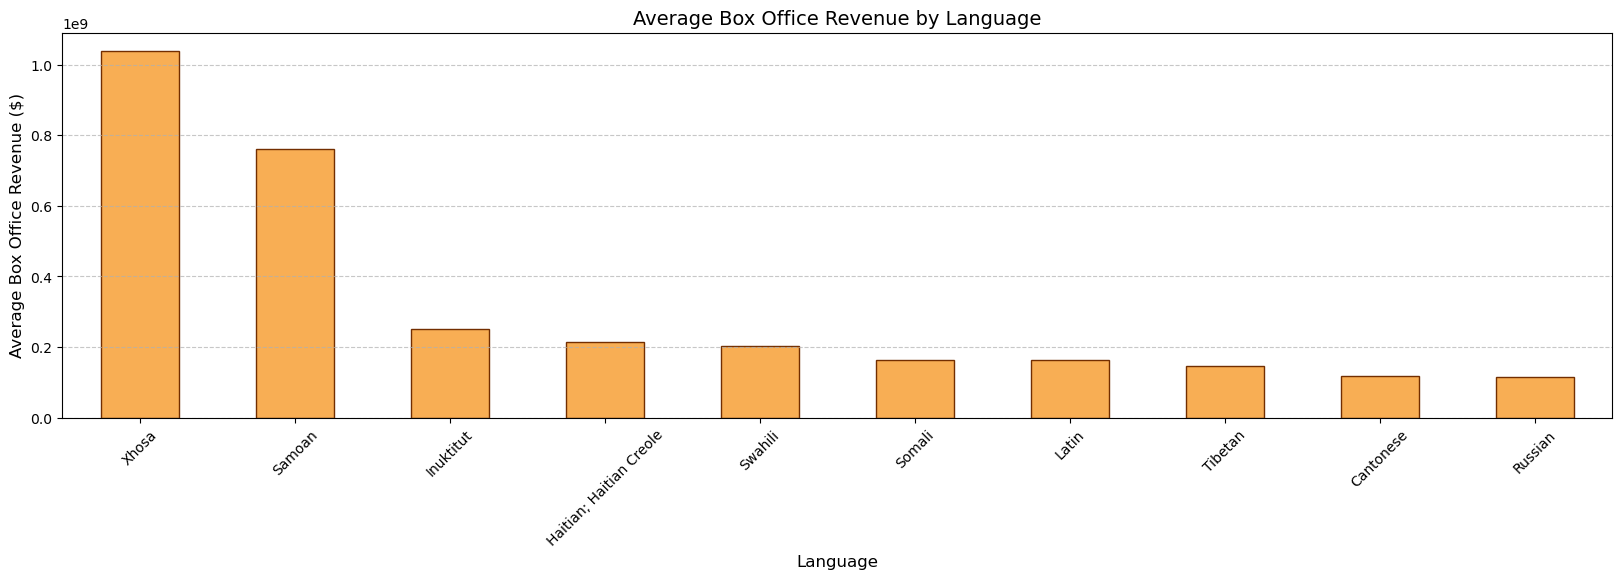

In [122]:
lang = tmdb.explode('Extracted Languages')
lang = lang.dropna(subset=['Extracted Languages'])

# Group and plot
language_revenue = lang.groupby('Extracted Languages')['revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(20, 5))
language_revenue.head(10).plot(kind='bar', color=GRAPH_COLORS[0], edgecolor=GRAPH_EDGECOLOR)
plt.title('Average Box Office Revenue by Language', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Average Box Office Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The analysis shows that **Xhosa** and **Samoan** appear as the top two languages based on average box office revenue. At first glance, this might suggest that using these languages could significantly enhance a movie's financial success. However, a deeper examination reveals this conclusion is misleading due to the small sample sizes for these languages in the dataset.

For **Xhosa**, there are only seven movies in the dataset that include the language. Among these, two have zero revenue, while the remaining five—**Avengers: Infinity War**, **Avengers: Endgame**, **Black Panther**, **Black Panther: Wakanda Forever**, and **District 9**—are blockbuster hits, disproportionately inflating the average. Similarly, for **Samoan**, there is only one movie in the dataset—**Fast & Furious Presents: Hobbs & Shaw**—a major commercial success.

These examples highlight how small sample sizes can skew results and lead to incorrect interpretations. To address this, we have implemented a limitation on sample size in our analysis, ensuring that insights are drawn from a statistically robust number of observations. This adjustment prevents outliers and anomalies from distorting our conclusions and provides a more accurate reflection of the relationship between language and box office revenue.


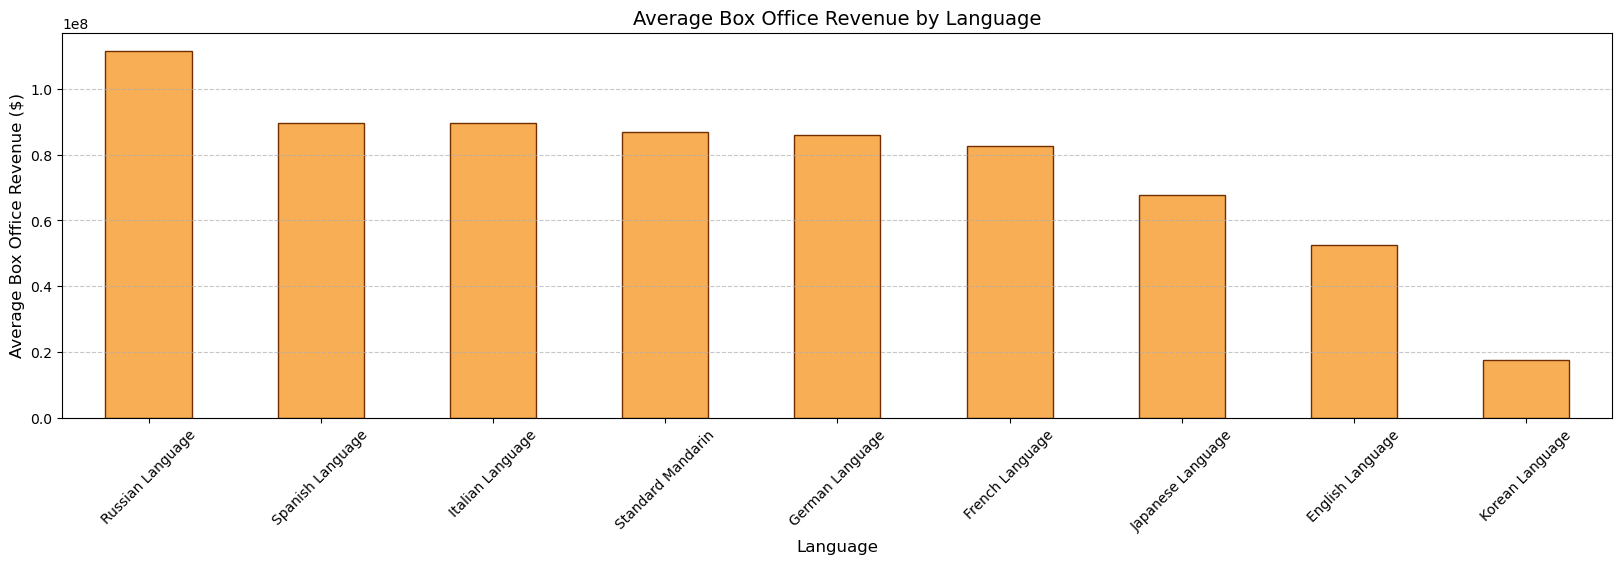

In [123]:
LIMIT_SAMPLE = 100

lang = movies.explode('Extracted Languages')
lang = lang.dropna(subset=['Extracted Languages'])


# Calculate the sample size for each language
language_counts = lang['Extracted Languages'].value_counts()

# Filter languages that meet the minimum sample size
valid_languages = language_counts[language_counts >= LIMIT_SAMPLE].index
filtered_lang = lang[lang['Extracted Languages'].isin(valid_languages)]

# Group and calculate average revenue for valid languages
language_revenue = filtered_lang.groupby('Extracted Languages')['Movie box office revenue'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 5))
language_revenue.head(10).plot(kind='bar', color=GRAPH_COLORS[0], edgecolor=GRAPH_EDGECOLOR)
plt.title('Average Box Office Revenue by Language', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Average Box Office Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Countries

#### Some analysis

Interpretation of the plot....

# Month of the year

#### Some kind of plot for the month of the year. The current plot is not the goal.

C:\Users\ebben\AppData\Local\Temp\ipykernel_184\3106829068.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned['Release Year'] = movies_cleaned['Movie release date'].dt.year


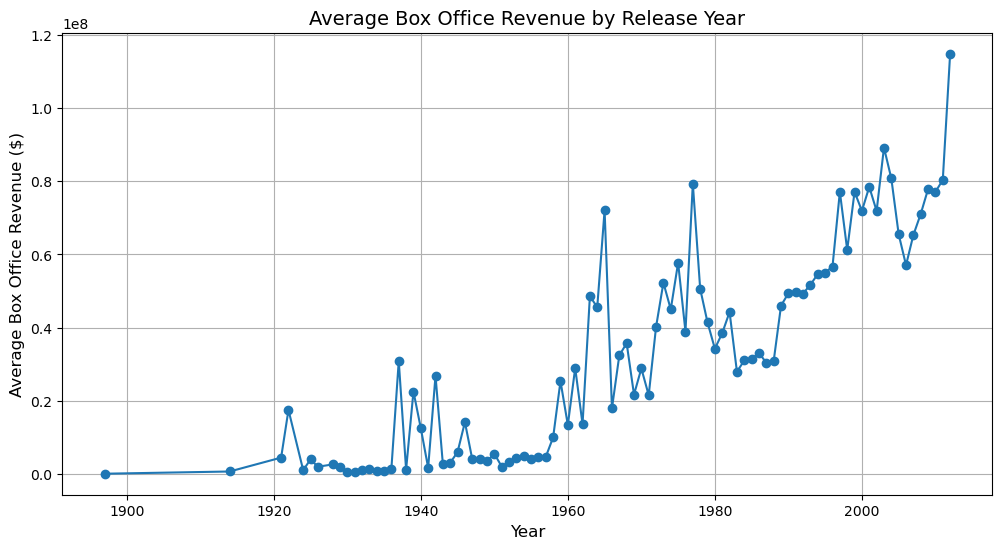

In [124]:
movies['Movie release date'] = pd.to_datetime(movies['Movie release date'], errors='coerce')
movies_cleaned = movies.dropna(subset=['Movie release date'])

# Group by year or month
movies_cleaned['Release Year'] = movies_cleaned['Movie release date'].dt.year
yearly_revenue = movies_cleaned.groupby('Release Year')['Movie box office revenue'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_revenue.index, yearly_revenue.values, marker='o')
plt.title('Average Box Office Revenue by Release Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Box Office Revenue ($)', fontsize=12)
plt.grid(True)
plt.show()

#### Bar chart for revenue over the year

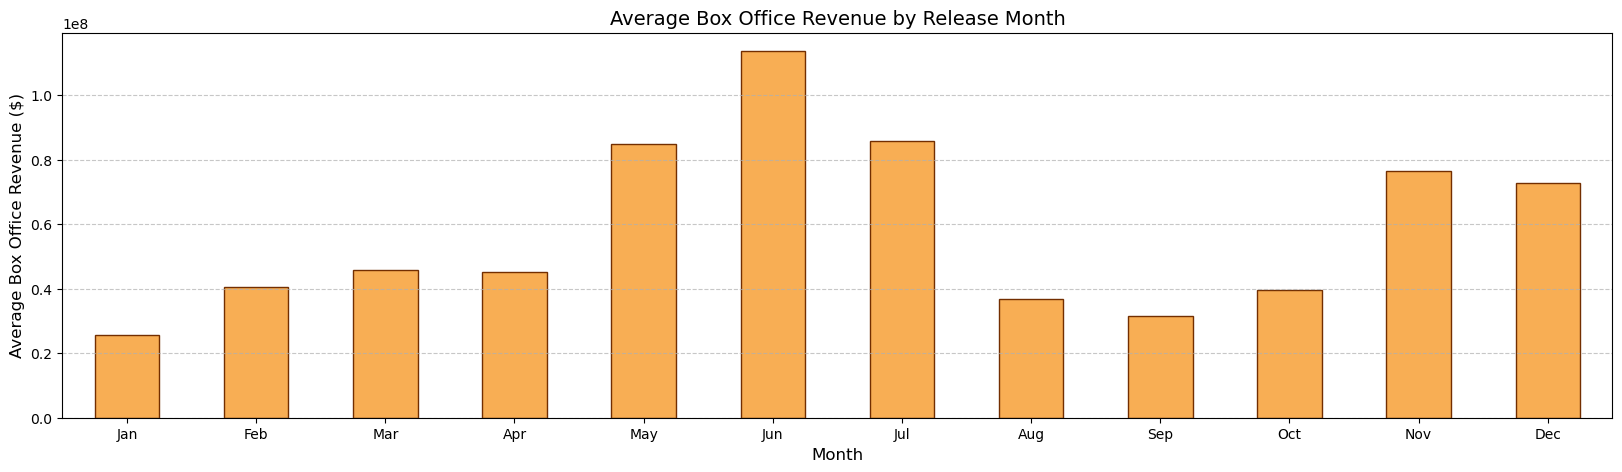

In [125]:
movies_month = movies.copy()
movies_month['Movie release date'] = pd.to_datetime(movies_month['Movie release date'], errors='coerce')
movies_month = movies_month.dropna(subset='Movie release date')
movies_month['Movie release month'] = pd.DatetimeIndex(movies_month['Movie release date']).month

# Group by year or month
monthly_revenue = movies_month.groupby('Movie release month')['Movie box office revenue'].mean()

# Plot
plt.figure(figsize=(20, 5))
monthly_revenue.plot(kind='bar', color=GRAPH_COLORS[0], edgecolor=GRAPH_EDGECOLOR)
plt.title('Average Box Office Revenue by Release Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Box Office Revenue ($)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar chart shows average box office revenue by release month. High-revenue months like May, June, July, November, and December align with blockbuster releases and holiday seasons. Low-revenue months, such as January, February, and September, often feature movies with lower commercial expectations. This highlights the strategic importance of release timing in maximizing box office success.

# Sentiment Summary Analysis

#### Some analysis

Interpretation of the plot....

# Actor Gender

#### Some analysis

Interpretation of the plot....

# Actor Popularity

#### Some analysis

Interpretation of the plot....

# Actor Age

#### Scatter plot linear regression

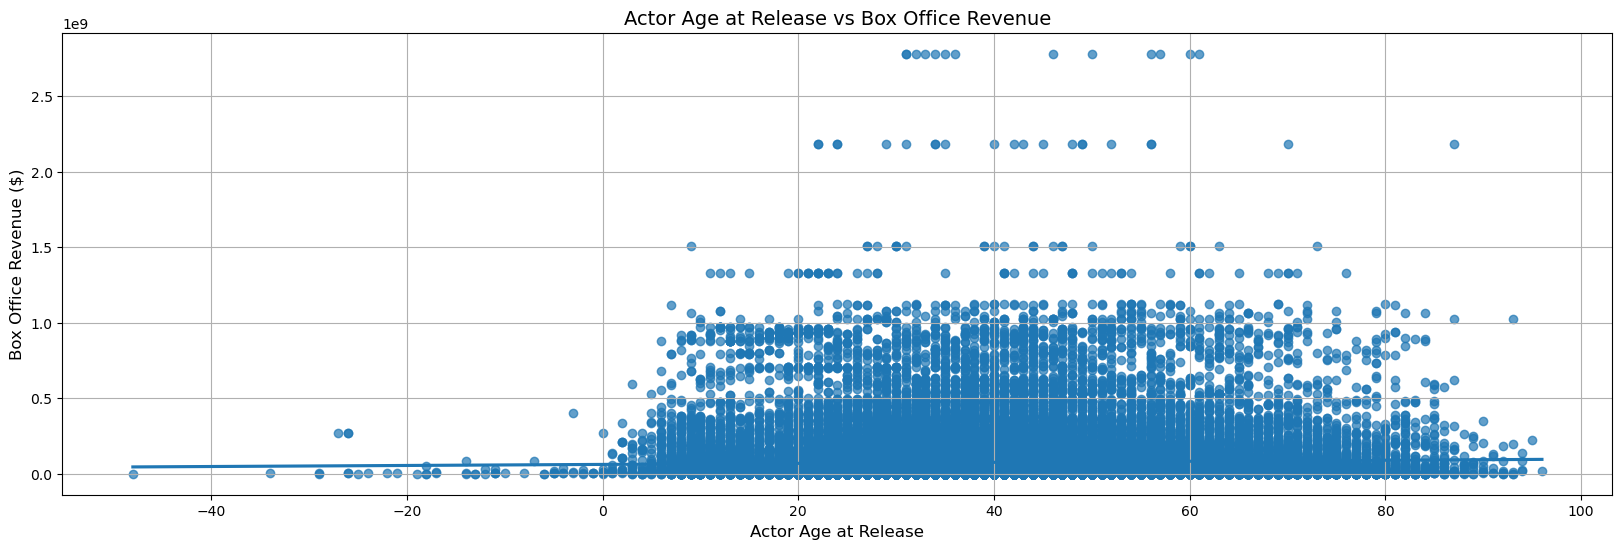

In [126]:
# Merge the two DataFrames on 'Wikipedia movie ID'
merged_df = pd.merge(characters, movies[['Wikipedia movie ID', 'Movie box office revenue']], on='Wikipedia movie ID', how='inner')

# Ensure 'Movie box office revenue' is numeric
merged_df['Movie box office revenue'] = pd.to_numeric(merged_df['Movie box office revenue'], errors='coerce')

# Drop rows with NaN values in the relevant columns
merged_df = merged_df.dropna(subset=['Actor age at movie release', 'Movie box office revenue'])

plt.figure(figsize=(20, 6))
sns.regplot(x=merged_df['Actor age at movie release'], y=merged_df['Movie box office revenue'], scatter_kws={'alpha': 0.7})
plt.title('Actor Age at Release vs Box Office Revenue', fontsize=14)
plt.xlabel('Actor Age at Release', fontsize=12)
plt.ylabel('Box Office Revenue ($)', fontsize=12)
plt.grid(True)
plt.show()


Interpretation of the plot....

# Genre

#### Bar Plot using CMU dataset

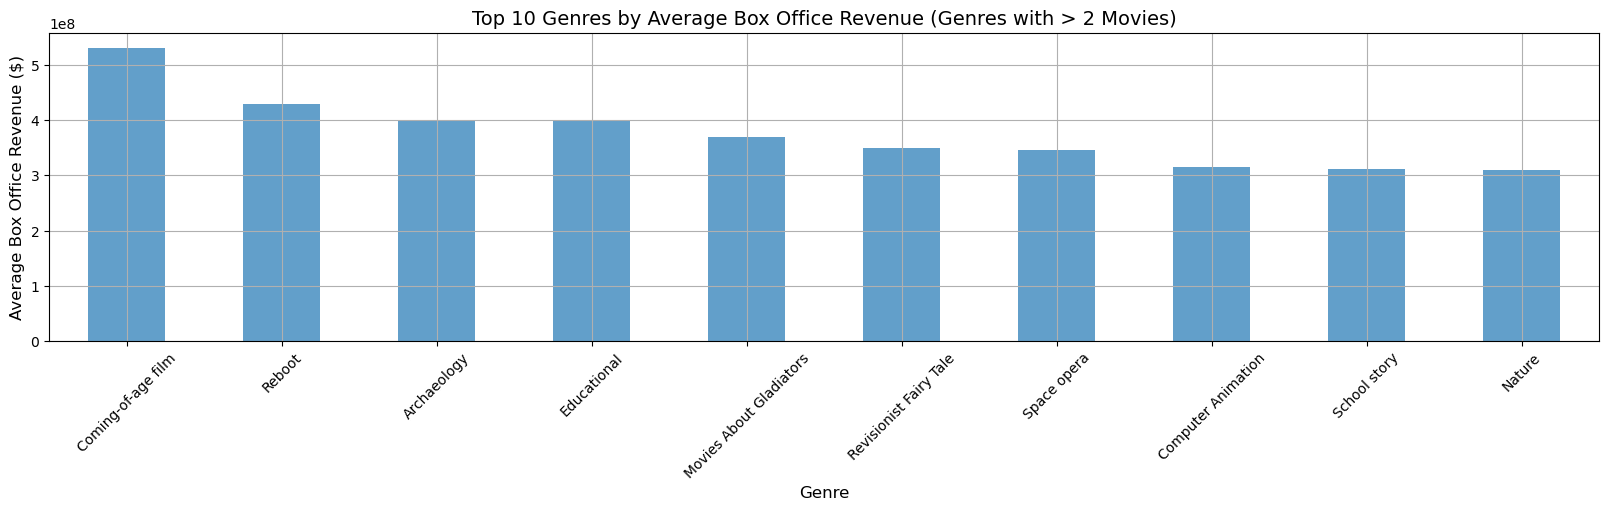

In [127]:
movies_with_genres = movies.explode('Extracted Genres')

genre_revenue = movies_with_genres.groupby('Extracted Genres')['Movie box office revenue'].mean().sort_values(ascending=False)

LIMIT_SAMPLE = 1
genre_counts = movies_with_genres['Extracted Genres'].value_counts()
valid_genres = genre_counts[genre_counts >= LIMIT_SAMPLE].index  

movies_with_valid_genres = movies_with_genres[movies_with_genres['Extracted Genres'].isin(valid_genres)]

genre_revenue = movies_with_valid_genres.groupby('Extracted Genres')['Movie box office revenue'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 4))
genre_revenue.head(10).plot(kind='bar', alpha=0.7)
plt.title(f'Top 10 Genres by Average Box Office Revenue (Genres with > {LIMIT_SAMPLE+1} Movies)', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Box Office Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

We can see that the top three movies are Computer Animation, Sci-Fi and Fairy Tale.

In spot number two we have computer animation, this genre is so high up because of it's target audience. Which is every single kid, most teenagers, and young people. These are the people who are most likey to buy a ticket to the movies. Not to mention that for every kid at least one parent will follow.

Of note:
With a sample size at 7 we get that reboots are the biggest success at over 4 billion revenue average, but we also get Nature in number 3 only because Avatar is included.
Let's look at reboots and why it's at the top. Ever since people started consuming movies and tv via internet the DVD sales have plummeted, resulting in the income for producers to drop. Before the income came from theater ticket sales and then DVD sales later on. Since the DVD sales are no more the studios are at a bigger risk at losing money. So they started to create reboots, the reason being that people know what to expect, they know they will like the movie therefore they will buy a ticket to the movies. The reboots have been a huge success and not surprising it's at number one.

#### Bar plot using TMDB

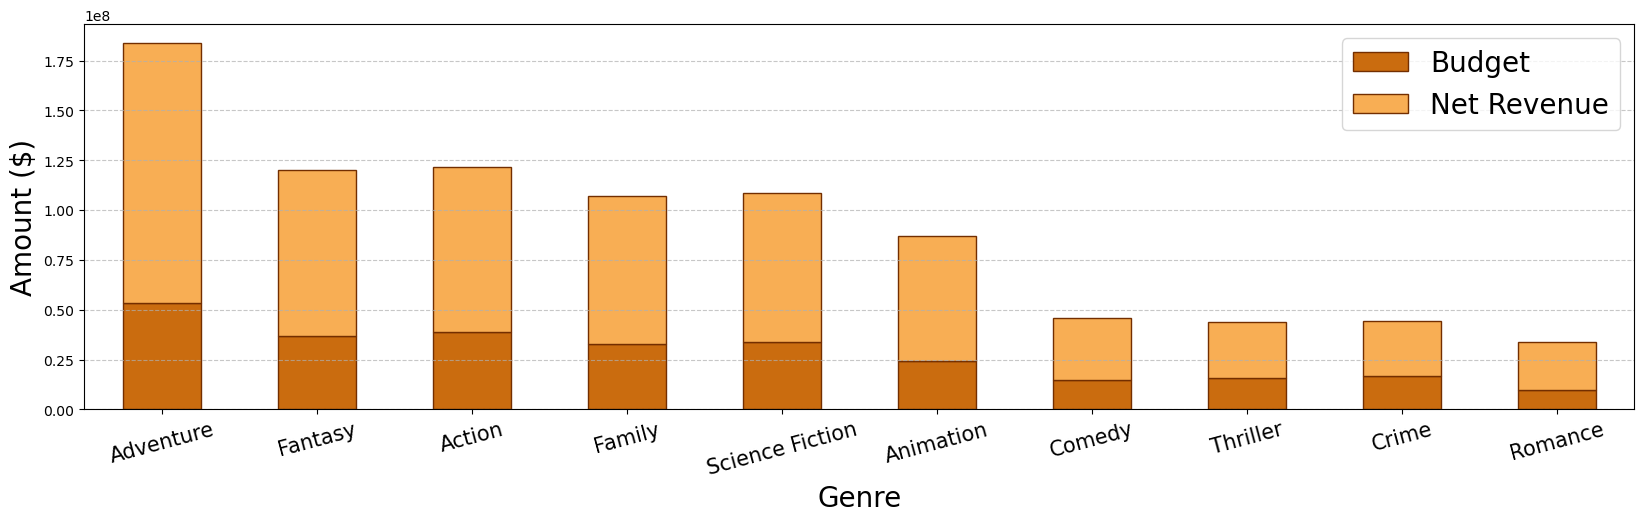

In [158]:
# Columns to show
columns = ['net revenue', 'budget']

# Drop rows with no genres, zero budget, or zero revenue
tmdb_cleaned = tmdb.dropna(subset=['Extracted Genres', columns[0], columns[1]])

# Explode genres into separate rows
tmdb_exploded = tmdb_cleaned.explode('Extracted Genres')

# Group by genre and calculate average budget and net revenue
genre_stats = tmdb_exploded.groupby('Extracted Genres')[[columns[0], columns[1]]].mean().sort_values(by=columns[0], ascending=False)

# Plot the top 10 genres with a stacked bar chart
top_genres = genre_stats.head(10)

# Adjust the stacked bar
fig, ax = plt.subplots(figsize=(20, 5))
top_genres[columns[1]].plot(kind='bar', color=GRAPH_COLORS[1], edgecolor=GRAPH_EDGECOLOR, ax=ax, label=get_capitalized_first_letter(columns[1]), alpha=1)
top_genres[columns[0]].plot(kind='bar', color=GRAPH_COLORS[0], edgecolor=GRAPH_EDGECOLOR, ax=ax, bottom=top_genres[columns[1]], label=get_capitalized_first_letter(columns[0]), alpha=1)

# Customize the plot
# plt.title('Top 10 Genres by Average Revenue and Budget', fontsize=26)
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Amount ($)', fontsize=20)
plt.xticks(fontsize=15, rotation=15)
plt.legend(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The data from the TMDB is a lot more representative when it comes to genre vs box office. 
We can see that adventure is at the top with 746 movies and the top 5 are:
- Avatar
- Avangers: End Game
- Avatar: The Way of Water
- Star Wars: The Force Awakens
- Avengers: Infinity War

# Number of Genres

#### Some analysis

Interpretation of the plot....

# Tropes?

In [159]:
# # Process trope data
# tvtropes['Movie box office revenue'] = tvtropes['Info'].apply(lambda x: x.get('Movie box office revenue', None))
# tvtropes = tvtropes.dropna(subset=['Movie box office revenue'])

# # Group and plot
# trope_revenue = tvtropes.groupby('Trope')['Movie box office revenue'].mean().sort_values(ascending=False)
# plt.figure(figsize=(12, 8))
# trope_revenue.head(10).plot(kind='bar', alpha=0.7)
# plt.title('Top Tropes by Average Box Office Revenue', fontsize=14)
# plt.xlabel('Trope', fontsize=12)
# plt.ylabel('Average Box Office Revenue ($)', fontsize=12)
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()


# Test

C:\Users\ebben\AppData\Local\Temp\ipykernel_184\47476955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned['Release Month Name'] = movies_cleaned['Movie release date'].dt.month_name()
C:\Users\ebben\AppData\Local\Temp\ipykernel_184\47476955.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned['Top Genre'] = movies_cleaned['Extracted Genres'].apply(lambda x: x[0] if x else None)
c:\Users\ebben\anaconda3\envs\ada\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure

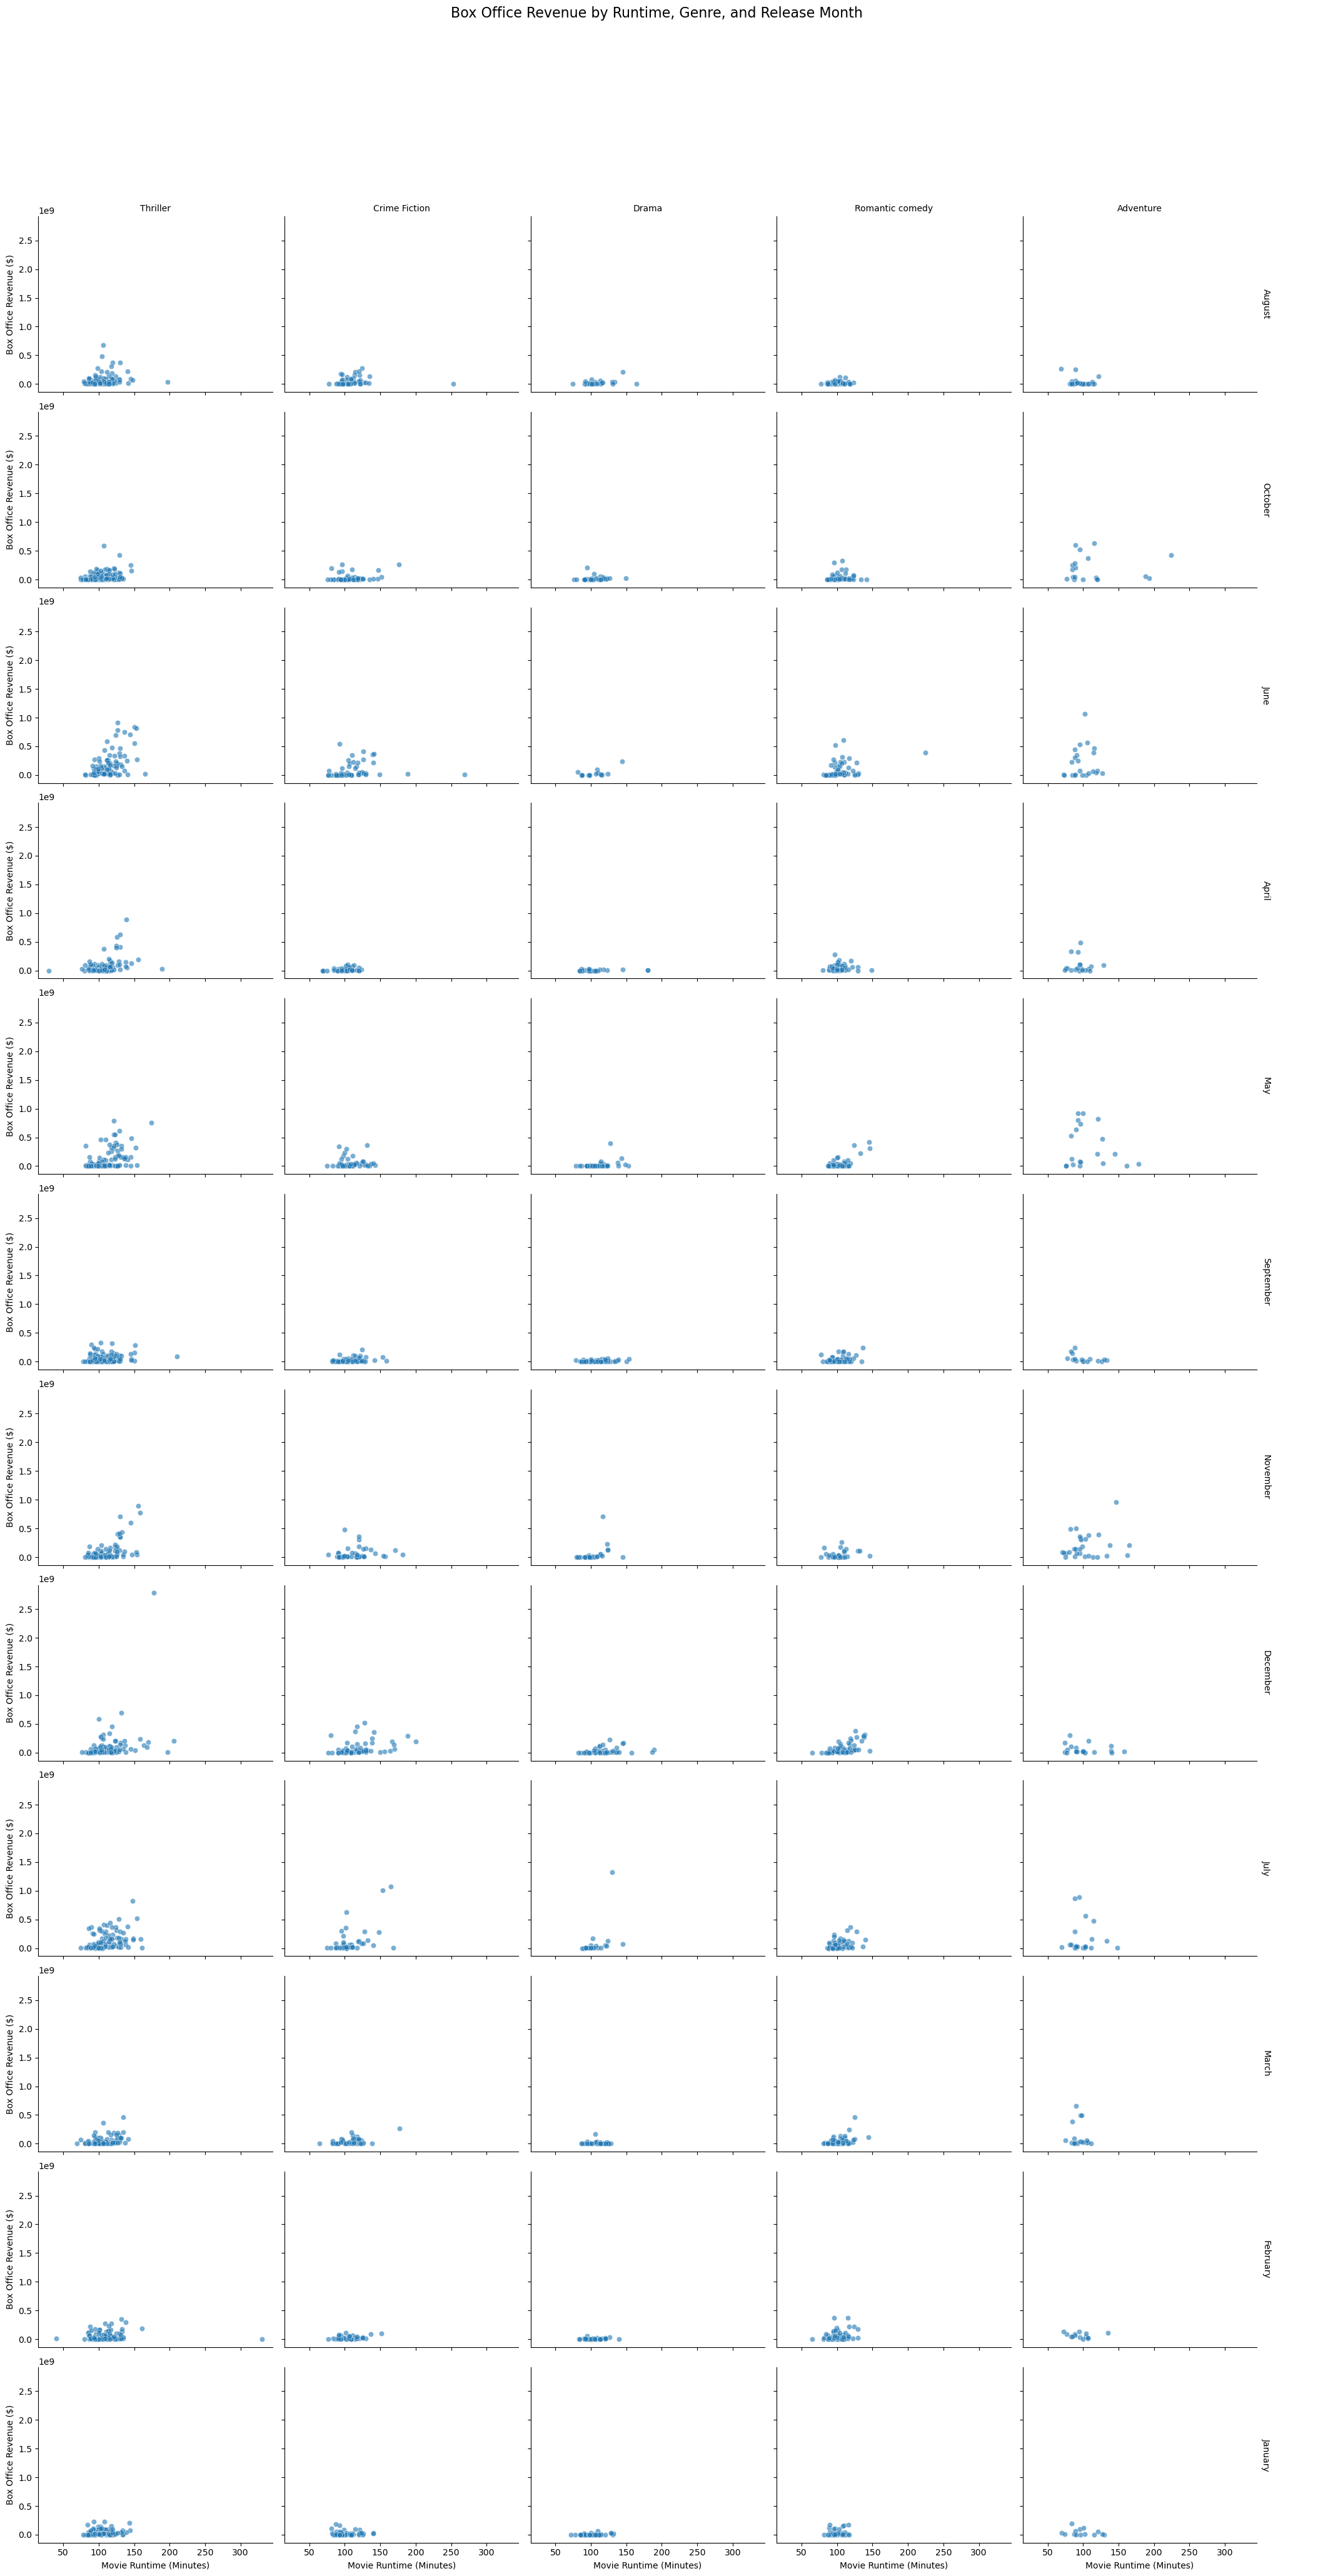

In [ ]:
# Create a new column for Release Month as a name
movies_cleaned['Release Month Name'] = movies_cleaned['Movie release date'].dt.month_name()

# Limit Genres to the Top 5 for Simplicity
movies_cleaned['Top Genre'] = movies_cleaned['Extracted Genres'].apply(lambda x: x[0] if x else None)
top_genres = movies_cleaned['Top Genre'].value_counts().index[:5]
movies_subset = movies_cleaned[movies_cleaned['Top Genre'].isin(top_genres)]

# Facet Grid for Revenue vs Budget, Faceted by Genre and Release Month
g = sns.FacetGrid(movies_subset, col="Top Genre", row="Release Month Name", margin_titles=True, height=3.5, aspect=1.2)
g.map(sns.scatterplot, "Movie runtime", "Movie box office revenue", alpha=0.6)

g.set_axis_labels("Movie Runtime (Minutes)", "Box Office Revenue ($)")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Box Office Revenue by Runtime, Genre, and Release Month", fontsize=16)
plt.show()


# Multiple Regression Analysis

Linear Regression R-squared: 0.36781577938715104
Linear Regression Mean Squared Error: 41.86893604596666
Random Forest R-squared: 0.6133170283816063
Random Forest Mean Squared Error: 25.60963099183341
Feature Importances (Random Forest):
                      Feature  Importance
3  Runtime_Budget_Interaction    0.617700
2                  popularity    0.242873
0                     runtime    0.089876
1                      budget    0.049551


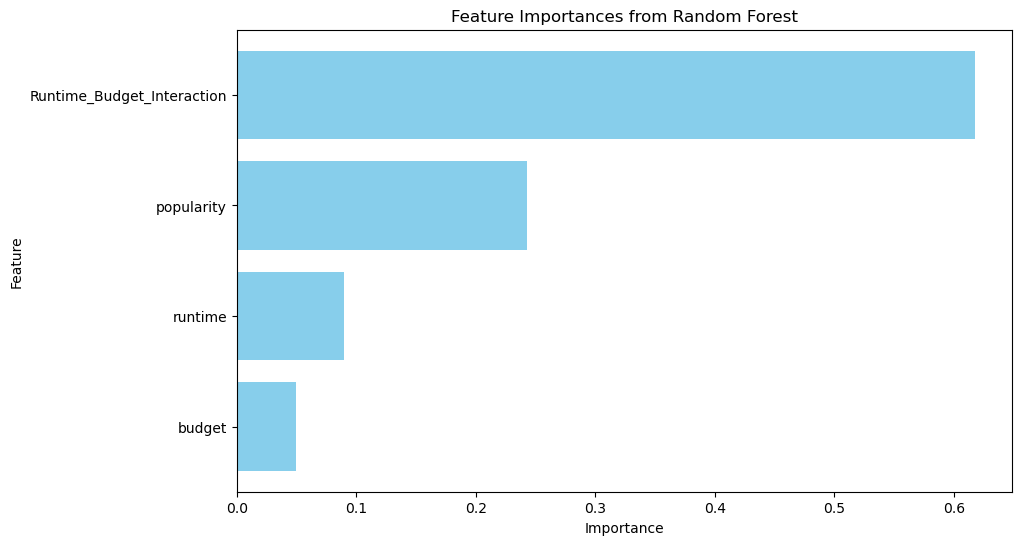

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from ast import literal_eval

# Helper functions for processing JSON-like columns
def str_to_list(entry):
    try:
        return [d['name'] for d in literal_eval(entry)]
    except:
        return []

# Load TMDB Data
PATH = 'cmu/'
tmdb = pd.read_csv(PATH + 'TMDB.csv')
tmdb.columns = [col.strip() for col in tmdb.columns]  # Clean up column names

# Process and Clean TMDB Data
tmdb['genres_list'] = tmdb['genres'].apply(str_to_list)
tmdb['languages_list'] = tmdb['spoken_languages'].apply(str_to_list)

# Convert relevant columns to numeric
tmdb['revenue'] = pd.to_numeric(tmdb['revenue'], errors='coerce')
tmdb['budget'] = pd.to_numeric(tmdb['budget'], errors='coerce')
tmdb['runtime'] = pd.to_numeric(tmdb['runtime'], errors='coerce')
tmdb = tmdb.dropna(subset=['revenue', 'budget', 'runtime', 'genres_list'])

# Log-transform revenue
tmdb['log_revenue'] = np.log1p(tmdb['revenue'])

# One-Hot Encoding for Top Genres and Languages
from collections import Counter

# Extract most common genres
genre_counter = Counter([genre for sublist in tmdb['genres_list'] for genre in sublist])
top_genres = [genre for genre, count in genre_counter.most_common(10)]
for genre in top_genres:
    tmdb[f'Genre_{genre}'] = tmdb['genres_list'].apply(lambda x: 1 if genre in x else 0)

# Extract most common languages
lang_counter = Counter([lang for sublist in tmdb['languages_list'] for lang in sublist])
top_languages = [lang for lang, count in lang_counter.most_common(5)]
for lang in top_languages:
    tmdb[f'Lang_{lang}'] = tmdb['languages_list'].apply(lambda x: 1 if lang in x else 0)

# Add Interaction Term
tmdb['Runtime_Budget_Interaction'] = tmdb['runtime'] * tmdb['budget']

# Prepare Data for Modeling
features = ['runtime', 'budget', 'popularity', 'Runtime_Budget_Interaction'] + [f'Genre_{genre}' for genre in top_genres] + [f'Lang_{lang}' for lang in top_languages]
X = tmdb[features]
y = tmdb['log_revenue']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("Linear Regression R-squared:", r2_lr)
print("Linear Regression Mean Squared Error:", mse_lr)

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Random Forest R-squared:", r2_rf)
print("Random Forest Mean Squared Error:", mse_rf)

# Feature Importance for Random Forest
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances (Random Forest):")
print(feature_importances)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()
